<a href="https://www.kaggle.com/code/aleksandrmorozov123/natural-language-processing?scriptVersionId=99381572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-dataset/lingSpam.csv
/kaggle/input/email-spam-dataset/enronSpamSubset.csv
/kaggle/input/email-spam-dataset/completeSpamAssassin.csv
/kaggle/input/22000-scotch-whisky-reviews/scotch_review.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv
/kaggle/input/comcastcomplaints/comcast_fcc_complaints_2015.csv
/kaggle/input/comcastcomplaints/comcast_consumeraffairs_complaints.csv


**Natural Language Processing - step by step**

In [2]:
# import required libraries
import numpy as np
import json
import pandas as pd

In [3]:
# read the data
df = pd.read_csv ('../input/twitter-sentiment-analysis-hatred-speech/test.csv')
df.head (5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


**Lowercase**

In [4]:
df['tweet'] = df['tweet'].apply (lambda x: " ".join (x.lower () for x in x.split ()))
df['tweet']

0        #studiolife #aislife #requires #passion #dedic...
1        @user #white #supremacists want everyone to se...
2        safe ways to heal your #acne!! #altwaystoheal ...
3        is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew e...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my song "so glad" free download! #shoegaze #ne...
Name: tweet, Length: 17197, dtype: object

**Remove punctuation**

In [5]:
df ['tweet'] = df['tweet'].str.replace (r"""[^\w\s]+""","", regex = True)

df['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone to see t...
2        safe ways to heal your acne altwaystoheal heal...
3        is the hp and the cursed child book up for res...
4        3rd bihday to my amazing hilarious nephew eli ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like a mermaid ð hairflip neverready f...
17194    hillary campaigned today in ohioomg amp used w...
17195    happy at work conference right mindset leads t...
17196    my song so glad free download shoegaze newmusi...
Name: tweet, Length: 17197, dtype: object

**Removing stop words**

In [6]:
import nltk
from nltk.corpus import stopwords

# remove stop words
stop = stopwords.words ('english')
df['tweet'] = df['tweet'].apply (lambda x: " ".join (x for x in x.split () if x not in stop))
df['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone see new ...
2        safe ways heal acne altwaystoheal healthy healing
3        hp cursed child book reservations already yes ...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready for...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

**Tokenizing step**

In [7]:
from textblob import TextBlob
TextBlob (df['tweet'][3]).words

WordList(['hp', 'cursed', 'child', 'book', 'reservations', 'already', 'yes', 'ððð', 'harrypotter', 'pottermore', 'favorite'])

**Stemming**

In [8]:
from nltk.stem import PorterStemmer
st = PorterStemmer ()
df['tweet'][:5].apply (lambda x: " ".join ([st.stem(word) for word in x.split ()]))

0    studiolif aislif requir passion dedic willpow ...
1    user white supremacist want everyon see new â ...
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye ððð harry...
4    3rd bihday amaz hilari nephew eli ahmir uncl d...
Name: tweet, dtype: object

**Lemmatizing**

In [9]:
from textblob import Word

df['tweet'] = df['tweet'].apply (lambda x: " ".join ([Word(word).
                                                     lemmatize () for word in x.split ()]))

df['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacist want everyone see new â...
2         safe way heal acne altwaystoheal healthy healing
3        hp cursed child book reservation already yes ð...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready for...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset lead cultu...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

**Exploring text data**

In [10]:
# import required libraries

import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

# computer the frequency of all words
frequency_dist = nltk.FreqDist (df['tweet'][:30])
frequency_dist

FreqDist({'studiolife aislife requires passion dedication willpower find newmaterialsâ': 1, 'user white supremacist want everyone see new â birdsâ movie â hereâs': 1, 'safe way heal acne altwaystoheal healthy healing': 1, 'hp cursed child book reservation already yes ððð harrypotter pottermore favorite': 1, '3rd bihday amazing hilarious nephew eli ahmir uncle dave love missesâ': 1, 'choose momtips': 1, 'something inside dy ððâ eye ness smokeyeyes tired lonely sof grungeâ': 1, 'finishedtattooinkedinkloveitâï âïâïâïâï thanksaleeee': 1, 'user user user never understand dad left young deep inthefeels': 1, 'delicious food lovelife capetown mannaepicure resturantâ': 1, ...})

In [11]:
sorted_frequency_dist = sorted (frequency_dist, key = frequency_dist.__getitem__, reverse = True)
sorted_frequency_dist

['studiolife aislife requires passion dedication willpower find newmaterialsâ',
 'user white supremacist want everyone see new â birdsâ movie â hereâs',
 'safe way heal acne altwaystoheal healthy healing',
 'hp cursed child book reservation already yes ððð harrypotter pottermore favorite',
 '3rd bihday amazing hilarious nephew eli ahmir uncle dave love missesâ',
 'choose momtips',
 'something inside dy ððâ eye ness smokeyeyes tired lonely sof grungeâ',
 'finishedtattooinkedinkloveitâï âïâïâïâï thanksaleeee',
 'user user user never understand dad left young deep inthefeels',
 'delicious food lovelife capetown mannaepicure resturantâ',
 '1000dayswasted narcosis infinite ep make aware grinding neuro bass lifestyle',
 'one world greatest spoing event lemans24 teamaudi',
 'half way website allgoingwell',
 'good food good life enjoy ðððððð called garlic bread iloveitâ',
 'ill stand behind guncontrolplease senselessshootings taketheguns comicrelief stillsad',
 'atei ate ateðð jamaisasthi fish

**Consider words with lengh greater than 5 and plot**

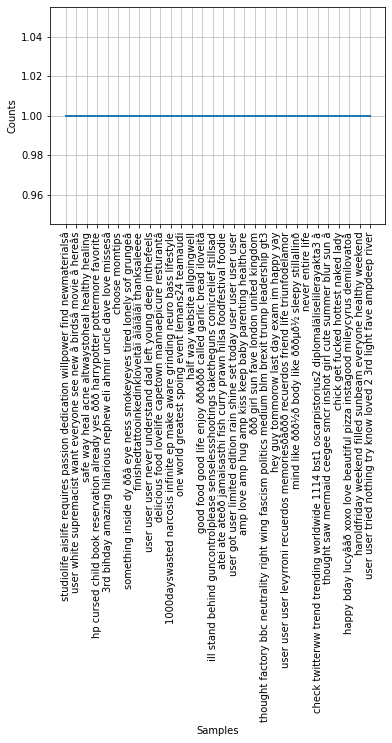

In [12]:
large_words = dict ([(k, v) for k, v in frequency_dist.items () if len (k) > 5])
frequency_dist = nltk.FreqDist (large_words)
frequency_dist.plot (50, cumulative = False)

**Build wordcloud**

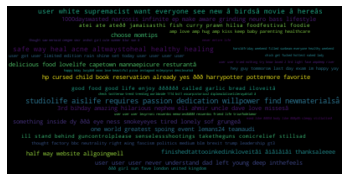

In [13]:
from wordcloud import WordCloud
tcloud = WordCloud ().generate_from_frequencies (frequency_dist)

# plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow (tcloud, interpolation = 'bilinear')
plt.axis ("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show ()

**Building a text preprocessing pipeline**

In [14]:
# read the data
datatweet = pd.read_csv ('../input/twitter-sentiment-analysis-hatred-speech/test.csv')
dtweet = datatweet ['tweet'][:30]

In [15]:
# write the function to process the tweets
def processRow (row):
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    dtweet = row
    
    #lower case
    dtweet = dtweet.apply (lambda x: " ".join (x.lower () for x in x.split ()))
    
    #Removes unicode strings like "\u002c" and "x96"
    dtweet = dtweet.str.replace (r"""(\\u[0-9A-Fa-f]+)""","")
    dtweet = dtweet.str.replace (r"""[^\x00-\x7f]""","")
    
    # convert any url to URL
    dtweet = dtweet.str.replace("""(www\.[^\s]+)|(htpps?://[^\s]+)""", 'URL')
    
    # convert any @Username to "AT_USER"
    dtweet = dtweet.str.replace ("""@[^\s]+""", 'AT_USER')
    
    # remove additional white spaces
    dtweet = dtweet.str.replace ("""[\s]+""", ' ') 
    dtweet = dtweet.str.replace ("""[\n]+""", ' ')
    
    # remove not alphanumeric symbols white spaces
    dtweet = dtweet.str.replace (r"""[^\w]""", ' ')
    
    # remove hashtag in front of a word """
    dtweet = dtweet.str.replace (r"""#([^\s]+)""", r"""\1""")
    
    # replace #word with word
    dtweet = dtweet.str.replace (r"""#([^\s]+)""", r"""\1""")
    
    # remove :( or :)
    dtweet = dtweet.replace (""":)",""")
    dtweet = dtweet.replace (""":(",""")
    
    #remove numbers
    dtweet = " ".join([i for i in dtweet if not i.isdigit ()])
    
    # remove multiple exclamation
    dtweet = re.sub (r"""(\!)\1+""", ' ', dtweet)
    
    # remove multiple question marks
    dtweet = re.sub (r"""(\?)\1+""", ' ', dtweet)
    
    # remove multistop
    dtweet = re.sub (r"""(\.)\1+""", ' ', dtweet)
    
    # lemma
    from textblob import Word
    dtweet = " ".join ([Word(word).lemmatize () for word in dtweet.split ()])
    
    # stemmer
    st = PorterStemmer ()
    dtweet = " ".join ([st.stem (word) for word in dtweet.split ()])
    
    # trim
    dtweet = dtweet.strip ('\'"')
    row = dtweet
    return row
    

In [16]:
# call the function with data
processRow (dtweet)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykern

'studiolif aislif requir passion dedic willpow to find newmateri at_us white supremacist want everyon to see the new bird movi and here whi safe way to heal your acn altwaystoh healthi heal is the hp and the curs child book up for reserv alreadi if ye where if no when harrypott pottermor favorit 3rd bihday to my amaz hilari nephew eli ahmir uncl dave love you and miss choos to be momtip someth insid me dy eye ness smokeyey tire lone sof grung finish tattoo ink ink loveit thank aleee at_us at_us at_us i will never understand whi my dad left me when i wa so young deep inthefeel delici food lovelif capetown mannaepicur restur 1000dayswast narcosi infinit ep make me awar grind neuro bass lifestyl one of the world s greatest spo event lemans24 teamaudi half way through the websit now and allgoingwel veri good food good life enjoy and thi is call garlic bread iloveit i ll stand behind thi guncontrolpleas senselessshoot takethegun comicrelief stillsad i ate i ate and i ate jamaisasthi fish cu

**Converting text to features**
- **One Hot encoding**

In [17]:
text = "eat healthy live healthy everyday fix whats broken in 5 words eat healthy live healthy body mind soul spirit"

pd.get_dummies (text.split ())

,5,body,broken,eat,everyday,fix,healthy,in,live,mind,soul,spirit,whats,words
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**Count vectorizing**

In [18]:
# import the function
from sklearn.feature_extraction.text import CountVectorizer

text = ["user user user never understand dad left young deep in the feels"]

# create the transform
vectorizer = CountVectorizer ()

# tokenizing
vectorizer.fit (text)

# encode document
vector = vectorizer.transform (text)

# summarize and generating output
print (vectorizer.vocabulary_)
print (vector.toarray ())

{'user': 8, 'never': 5, 'understand': 7, 'dad': 0, 'left': 4, 'young': 9, 'deep': 1, 'in': 3, 'the': 6, 'feels': 2}
[[1 1 1 1 1 1 1 1 3 1]]


**Generating N-grams using TextBlob**

In [19]:
text = 'haroldfriday have a weekend filled with sunbeams everyone healthy weekend'

# import TextBlob
from textblob import TextBlob

TextBlob (text).ngrams (1)

[WordList(['haroldfriday']),
 WordList(['have']),
 WordList(['a']),
 WordList(['weekend']),
 WordList(['filled']),
 WordList(['with']),
 WordList(['sunbeams']),
 WordList(['everyone']),
 WordList(['healthy']),
 WordList(['weekend'])]

In [20]:
TextBlob (text).ngrams (2)

[WordList(['haroldfriday', 'have']),
 WordList(['have', 'a']),
 WordList(['a', 'weekend']),
 WordList(['weekend', 'filled']),
 WordList(['filled', 'with']),
 WordList(['with', 'sunbeams']),
 WordList(['sunbeams', 'everyone']),
 WordList(['everyone', 'healthy']),
 WordList(['healthy', 'weekend'])]

**Bigram-based features for a document**

In [21]:
# import the function
from sklearn.feature_extraction.text import CountVectorizer

text = ['enjoying the sunshine god is good orlando sunshinestate goodlife bosslady joy']

# create the transform
vectorizer.fit (text)

# encode document
vector = vectorizer.transform (text)

# summarize and generating output
print (vectorizer.vocabulary_)
print (vector.toarray ())

{'enjoying': 1, 'the': 10, 'sunshine': 8, 'god': 2, 'is': 5, 'good': 3, 'orlando': 7, 'sunshinestate': 9, 'goodlife': 4, 'bosslady': 0, 'joy': 6}
[[1 1 1 1 1 1 1 1 1 1 1]]


**Co-occurence matrix**

In [22]:
# import required libraries
import numpy as np
import nltk
from nltk import bigrams
import itertools

# create function

def co_occurence_matrix (corpus):
    vocab = set (corpus)
    vocab = list (vocab)
    vocab_to_index = {word:i for i, word in enumerate (vocab)}
    # create bi-grams from all words in corpus
    bi_grams = list (bigrams (corpus))
    # frequency distribution of bi-grams
    bigram_freq = nltk.FreqDist (bi_grams).most_common (len (bi_grams))
    # Initialise co-occurence matrix
    co_occurence_matrix = np.zeros ((len (vocab), len (vocab)))
    
    # loop through the bigrams taking thr current and previous words
    for bigram in bigram_freq:
        current = bigram [0][1]
        previous = bigram [0][1]
        count = bigram [1]
        pos_current = vocab_to_index [current]
        pos_previous = vocab_to_index [previous]
        co_occurence_matrix [pos_current][pos_previous] = count
    co_occurence_matrix = np.matrix (co_occurence_matrix)
    # return the matrix and the index
    return co_occurence_matrix, vocab_to_index

In [23]:
sentences = [['user', 'never', 'understand', 'dad', 'left', 'young', 'deep', 'in', 'the', 'feels'],
             ['enjoying', 'the', 'sunshine', 'god', 'is', 'good', 'orlando', 'sunshinestate', 'goodlife', 'bosslady', 'joy'],
             ['haroldfriday', 'have', 'a', 'weekend', 'filled', 'with', 'sunbeams', 'everyone', 'healthy', 'weekend']]

# create one list using many lists
merged = list (itertools.chain.from_iterable (sentences))
matrix = co_occurence_matrix (merged)

# generate the matrix
CoMatrixFinal = pd.DataFrame (matrix [0])
print (CoMatrixFinal)

     0    1    2    3    4    5    6    7    8    9   ...   19   20   21   22  \
0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

**Hash vectorizer**

In [24]:
# import required libraries
from sklearn.feature_extraction.text import HashingVectorizer

# list of text documents
text = ['and the forecast looks good for the weather all across bolton']

# transform
vectorizer = HashingVectorizer (n_features = 10)

# create the hashing vector
vector = vectorizer.transform (text)

# summarize the vector
print (vector.shape)
print (vector.toarray ())

(1, 10)
[[ 0.          0.75592895  0.37796447 -0.37796447  0.          0.
   0.          0.         -0.37796447  0.        ]]


**Converting text to features using TF-IDF**

In [25]:
text = ['i have been working on my anatomy study guide since 5 pm and i am still not done isuck plspassme']

# import TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer ()

# tokenize and build vocab
vectorizer.fit (text)

# summarize
print (vectorizer.vocabulary_)
print (vectorizer.idf_)

{'have': 6, 'been': 3, 'working': 16, 'on': 10, 'my': 8, 'anatomy': 1, 'study': 15, 'guide': 5, 'since': 13, 'pm': 12, 'and': 2, 'am': 0, 'still': 14, 'not': 9, 'done': 4, 'isuck': 7, 'plspassme': 11}
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Implementing word embeddings**

Word2Vec(vocab=47, vector_size=100, alpha=0.025)


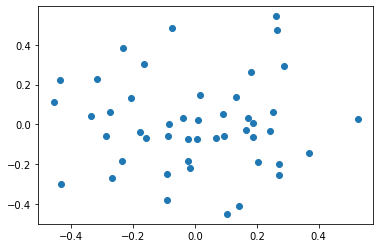

In [26]:
sentences = [['user', 'never', 'understand', 'dad', 'left', 'young', 'deep', 'in', 'the', 'feels'],
             ['enjoying', 'the', 'sunshine', 'god', 'is', 'good', 'orlando', 'sunshinestate', 'goodlife', 'bosslady', 'joy'],
             ['haroldfriday', 'have', 'a', 'weekend', 'filled', 'with', 'sunbeams', 'everyone', 'the', 'healthy', 'weekend'],
            ['i', 'have', 'been', 'working', 'on', 'my', 'anatomy', 'study', 'guide', 'since', '5', 'pm', 'and', 'i', 'am', 'still', 'not', 'done', 'isuck', 'the', 'plspassme']]

# import required libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


# training the model
skipgram = Word2Vec(sentences, window = 3, min_count=1,sg = 1)

print (skipgram)

# visualize
X = skipgram.wv.get_normed_vectors()
pca = PCA (n_components = 2)
result = pca.fit_transform (X)

# create a scatter plot of the projection
pyplot.scatter (result [:, 0], result [:, 1])
words = len (skipgram.wv)
pyplot.show ()

**Continuous bag of words (CBOW)**

Word2Vec(vocab=47, vector_size=100, alpha=0.025)


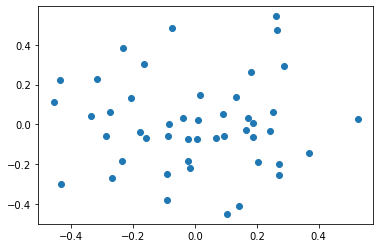

In [27]:
# import required libraries
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# example sentences
sentences = [['user', 'never', 'understand', 'dad', 'left', 'young', 'deep', 'in', 'the', 'feels'],
             ['enjoying', 'the', 'sunshine', 'god', 'is', 'good', 'orlando', 'sunshinestate', 'goodlife', 'bosslady', 'joy'],
             ['haroldfriday', 'have', 'a', 'weekend', 'filled', 'with', 'sunbeams', 'everyone', 'the', 'healthy', 'weekend'],
            ['i', 'have', 'been', 'working', 'on', 'my', 'anatomy', 'study', 'guide', 'since', '5', 'pm', 'and', 'i', 'am', 'still', 'not', 'done', 'isuck', 'the', 'plspassme']]

# training the model
cbow = Word2Vec (sentences, vector_size = 100, window = 3, min_count = 1, sg = 1)
print (cbow)

# save model
cbow.save ('cbow.bin')

# load model
cbow = Word2Vec.load ('cbow.bin')

# visualize
X = cbow.wv.get_normed_vectors()
pca = PCA (n_components = 2)
result = pca.fit_transform (X)

# create a scatter plot of the projection
pyplot.scatter (result [:, 0], result [:, 1])
words = len (cbow.wv)
pyplot.show ()

In [28]:
import gensim
# load the saved 
model = gensim.models.Word2Vec (dtweet)

# checking how similarity works
print (model.wv.most_similar ('book', 'is'))

[(' ', 0.99809330701828), ('e', 0.9978134632110596), ('#', 0.9976254105567932), ('t', 0.9976037740707397), ('r', 0.9975504279136658), ('n', 0.9974068403244019), ('u', 0.997260332107544), ('l', 0.997090220451355), ('d', 0.9970849752426147), ('\x9f', 0.997031569480896)]


**Implementing fastText**

FastText(vocab=47, vector_size=20, alpha=0.025)


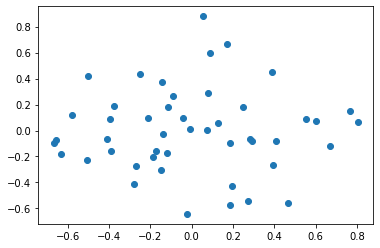

In [29]:
# import FastText
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Example sentences
sentences = [['user', 'never', 'understand', 'dad', 'left', 'young', 'deep', 'in', 'the', 'feels'],
             ['enjoying', 'the', 'sunshine', 'god', 'is', 'good', 'orlando', 'sunshinestate', 'goodlife', 'bosslady', 'joy'],
             ['haroldfriday', 'have', 'a', 'weekend', 'filled', 'with', 'sunbeams', 'everyone', 'the', 'healthy', 'weekend'],
            ['i', 'have', 'been', 'working', 'on', 'my', 'anatomy', 'study', 'guide', 'since', '5', 'pm', 'and', 'i', 'am', 'still', 'not', 'done', 'isuck', 'the', 'plspassme']]
fast = FastText (sentences, vector_size = 20, window = 1, min_count = 1, workers = 5, min_n = 1, max_n = 2)

# vector for word the
print (fast)

# visualize
X = fast.wv.get_normed_vectors()
pca = PCA (n_components = 2)
result = pca.fit_transform (X)

# create a scatter plot of the projection
pyplot.scatter (result [:, 0], result [:, 1])
words = len (fast.wv)
pyplot.show ()

**Extracting noun phrases**

In [30]:
# import required libraries
import nltk
from textblob import TextBlob

# extract noun
blob = TextBlob ('i have been working on my anatomy study guide since 5 pm and i am still not done isuck plspassme')
for np in blob.noun_phrases:
    print (np)

anatomy study
isuck plspassme


**Find the similarity**

In [31]:
documents = ('eat healthy live healthy everyday fix whats broken in 5 words eat healthy live healthy body mind soul spirit', 
             'and the forecast looks good for the weather all across bolton',
            '3rd bihday amazing hilarious nephew eli ahmir uncle dave love misses')

# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# compute tfidf
tfidf_vectorizer = TfidfVectorizer ()
tfidf_matrix = tfidf_vectorizer.fit_transform (documents)
tfidf_matrix.shape

(3, 34)

In [32]:
# compute similarity for first sentence with rest of the sentences
cosine_similarity (tfidf_matrix [0:2], tfidf_matrix)

array([[1., 0., 0.],
       [0., 1., 0.]])

**Tagging part of speech**

In [33]:
text = 'one of the worlds greatest spoing events lemans24 team audi'

# import required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set (stopwords.words ('english'))

# tokenize the text
tokens = sent_tokenize (text)

# generate tagging for all tokens using loop
for i in tokens:
    words = nltk.word_tokenize (i)
    words = [w for w in words if not w in stop_words]
    # POS-tagger
    tags = nltk.pos_tag (words)
tags

[('one', 'CD'),
 ('worlds', 'VBZ'),
 ('greatest', 'JJS'),
 ('spoing', 'VBG'),
 ('events', 'NNS'),
 ('lemans24', 'JJ'),
 ('team', 'NN'),
 ('audi', 'NN')]

**Using SpaCy**

In [34]:
import spacy
nlp = spacy.load ('en_core_web_sm')

# create a sentence
doc = nlp(u'one of the worlds greatest sporting events lemans24 team audi')

for ent in doc.ents:
    print (ent.text, ent.start_char, ent.end_char, ent.label_)

one 0 3 CARDINAL
lemans24 team audi 43 61 ORG


**Extracting topics from text**

In [35]:
doc1 = "lipo-light helped shape her, and it can help shape you. learn more@user loseinches burnfat result"
doc2 = "one of the worlds greatest sporting events lemans24 team audi"
doc3 = "and the forecast looks good for the weather all across bolton"

doc_complete = [doc1, doc2, doc3]
doc_complete

['lipo-light helped shape her, and it can help shape you. learn more@user loseinches burnfat result',
 'one of the worlds greatest sporting events lemans24 team audi',
 'and the forecast looks good for the weather all across bolton']

In [36]:
# import required libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# text preprocessing
stop = set (stopwords.words ('english'))
exclude = set (string.punctuation)
lemma = WordNetLemmatizer ()
def clean (doc):
    stop_free = " ".join ([i for i in doc.lower ().split () if i not in stop])
    punc_free = " ".join (ch for ch in stop_free if ch not in exclude)
    normalized = " ".join (lemma.lemmatize (word) for word in punc_free.split ())
    return normalized

doc_clean = [clean (doc).split () for doc in doc_complete]
doc_clean

[['l',
  'i',
  'p',
  'o',
  'l',
  'i',
  'g',
  'h',
  't',
  'h',
  'e',
  'l',
  'p',
  'e',
  'd',
  's',
  'h',
  'a',
  'p',
  'e',
  'h',
  'e',
  'r',
  'h',
  'e',
  'l',
  'p',
  's',
  'h',
  'a',
  'p',
  'e',
  'y',
  'o',
  'u',
  'l',
  'e',
  'a',
  'r',
  'n',
  'm',
  'o',
  'r',
  'e',
  'u',
  's',
  'e',
  'r',
  'l',
  'o',
  's',
  'e',
  'i',
  'n',
  'c',
  'h',
  'e',
  's',
  'b',
  'u',
  'r',
  'n',
  'f',
  'a',
  't',
  'r',
  'e',
  's',
  'u',
  'l',
  't'],
 ['o',
  'n',
  'e',
  'w',
  'o',
  'r',
  'l',
  'd',
  's',
  'g',
  'r',
  'e',
  'a',
  't',
  'e',
  's',
  't',
  's',
  'p',
  'o',
  'r',
  't',
  'i',
  'n',
  'g',
  'e',
  'v',
  'e',
  'n',
  't',
  's',
  'l',
  'e',
  'm',
  'a',
  'n',
  's',
  '2',
  '4',
  't',
  'e',
  'a',
  'm',
  'a',
  'u',
  'd',
  'i'],
 ['f',
  'o',
  'r',
  'e',
  'c',
  'a',
  's',
  't',
  'l',
  'o',
  'o',
  'k',
  's',
  'g',
  'o',
  'o',
  'd',
  'w',
  'e',
  'a',
  't',
  'h',
  'e',
  'r',
  'a

**Preparing document term matrix**

In [37]:
# importing gensim
import gensim
from gensim import corpora

# creating the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary (doc_clean)

# converting a list of documents (corpus) into Document-Term matrix using dictionary prepared above
doc_term_matrix = [dictionary.doc2bow (doc) for doc in doc_clean]

doc_term_matrix

[[(0, 4),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 12),
  (5, 1),
  (6, 1),
  (7, 7),
  (8, 3),
  (9, 7),
  (10, 1),
  (11, 3),
  (12, 4),
  (13, 5),
  (14, 6),
  (15, 6),
  (16, 3),
  (17, 4),
  (18, 1)],
 [(0, 4),
  (3, 2),
  (4, 7),
  (6, 2),
  (8, 2),
  (9, 2),
  (10, 2),
  (11, 4),
  (12, 3),
  (13, 1),
  (14, 3),
  (15, 5),
  (16, 5),
  (17, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(0, 3),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 3),
  (5, 1),
  (6, 1),
  (7, 1),
  (9, 2),
  (11, 1),
  (12, 8),
  (14, 3),
  (15, 4),
  (16, 3),
  (22, 1),
  (23, 1)]]

**LDA model**

In [38]:
# creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# runnug and trainig LDA model on the document term matrix for 3 topics
ldamodel = Lda (doc_term_matrix, num_topics = 3, id2word = dictionary, passes = 50)

# results
print (ldamodel.print_topics (num_topics = 20, num_words = 20))

[(0, '0.125*"o" + 0.113*"e" + 0.103*"s" + 0.092*"t" + 0.081*"a" + 0.070*"r" + 0.059*"n" + 0.048*"l" + 0.037*"g" + 0.037*"d" + 0.026*"m" + 0.026*"w" + 0.026*"c" + 0.026*"i" + 0.015*"v" + 0.015*"2" + 0.015*"4" + 0.015*"k" + 0.015*"f" + 0.015*"b"'), (1, '0.156*"e" + 0.093*"h" + 0.093*"l" + 0.080*"r" + 0.080*"s" + 0.068*"p" + 0.055*"u" + 0.055*"a" + 0.055*"o" + 0.042*"i" + 0.042*"n" + 0.042*"t" + 0.017*"f" + 0.017*"b" + 0.017*"c" + 0.017*"y" + 0.017*"m" + 0.017*"g" + 0.017*"d" + 0.004*"k"'), (2, '0.042*"b" + 0.042*"f" + 0.042*"h" + 0.042*"c" + 0.042*"o" + 0.042*"d" + 0.042*"g" + 0.042*"l" + 0.042*"r" + 0.042*"s" + 0.042*"a" + 0.042*"t" + 0.042*"p" + 0.042*"u" + 0.042*"m" + 0.042*"e" + 0.042*"n" + 0.042*"i" + 0.042*"k" + 0.042*"w"')]


**Classifying text**

In [39]:
# read the data 
email = pd.read_csv ('../input/email-spam-dataset/enronSpamSubset.csv') 

# understanding data
email.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Body', 'Label'], dtype='object')

In [40]:
email = email.rename (columns = {"Body": "Email"})
email.head (10)

,Unnamed: 0,Unnamed: 0.1,Email,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1
5,3676,3676,Subject: dont pay more than $ 100 for ur softw...,1
6,12991,12991,Subject: paliourg\n micros 0 ft for pennies\n ...,1
7,9884,9884,"Subject: all graphics software available , che...",1
8,8221,8221,"Subject: the man of stteel\n hello , welcome t...",1
9,5377,5377,"Subject: adjourn pasteup\n paliourg ,\n lookin...",1


**Text preprocessing and feature engineering**

In [41]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

# preprocessing steps like lower case, stemming and lemmatization
email ["Email"] = email ["Email"].apply (lambda x: " ".join (x.lower () for x in x.split ()))
stop = stopwords.words ('english')
email ["Email"] = email ["Email"].apply (lambda x: " ".join (x for x in x.split () if x not in stop))
st = PorterStemmer ()
email ["Email"] = email ["Email"].apply (lambda x: " ".join ([st.stem (word) for word in x.split ()]))
email ["Email"] = email ["Email"].apply (lambda x: " ".join ([Word (word).lemmatize () for word in x.split ()]))
email.head (10)

,Unnamed: 0,Unnamed: 0.1,Email,Label
0,2469,2469,subject: stock promo mover : cwtd * * * urgent...,1
1,5063,5063,subject: list major search engin ? submit webs...,1
2,12564,12564,"subject: import inform thu , 30 jun 2005 . sub...",1
3,2796,2796,subject: = ? utf - 8 ? q ? bask life ? = = ? u...,1
4,1468,1468,"subject: "" bidstogo "" place go , thing hello ,...",1
5,3676,3676,subject: dont pay $ 100 ur softwar miseri chhe...,1
6,12991,12991,subject: paliourg micro 0 ft penni check ' em ...,1
7,9884,9884,"subject: graphic softwar avail , cheap oem ver...",1
8,8221,8221,"subject: man stteel hello , welcom medzonlin d...",1
9,5377,5377,"subject: adjourn pasteup paliourg , look expen...",1


In [42]:
# splitting data into train and validation
train_x, valid_x, train_y, valid_y = train_test_split (email ["Email"], email ["Label"])

# TFIDF feature generation for a maximum of 6000 features
encoder = preprocessing.LabelEncoder ()
train_y = encoder.fit_transform (train_y)
valid_y = encoder.fit_transform (valid_y)

tfidf_vect = TfidfVectorizer (analyzer = 'word', token_pattern = r'\w{1,}', max_features = 6000)
tfidf_vect.fit (email ["Email"])
xtrain_tfidf = tfidf_vect.transform (train_x)
xvalid_tfidf = tfidf_vect.transform (valid_x)

xtrain_tfidf.data

array([0.0907956 , 0.15931517, 0.12029211, ..., 0.04290751, 0.18295704,
       0.17682143])

**Model training**

In [43]:
def train_model (classifier, feature_vector_train, label, feature_vector_valid, is_neural_net = False):
    # fit the trainig dataset on the classifier
    classifier.fit (feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict (feature_vector_valid)
    return metrics.accuracy_score (predictions, valid_y)

# Naive Bayes training
accuracy = train_model (naive_bayes.MultinomialNB (alpha = 0.2), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Accuracy:  0.9804


In [44]:
# Linear classifier on Word level TF IDF Vectors
accuracy = train_model (linear_model.LogisticRegression (), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Accuracy:  0.9772


**Sentiment analysis**

In [45]:
# read the sample
sentiment1 = "it's unbelievable that in the 21st century we'd need something like this. again. neverump xenopho..."
sentiment2 = "thank you! super love it! zpamdelacruz wedding dolores, capas tarlac"

# import required libraries
from textblob import TextBlob

# TextBlob has a pretrained sentiment prediction model
blob = TextBlob (sentiment1)
blob.sentiment

Sentiment(polarity=-0.125, subjectivity=0.5)

In [46]:
# now lets look at the sentiment2
blob = TextBlob (sentiment2)
blob.sentiment

Sentiment(polarity=0.47916666666666663, subjectivity=0.6333333333333333)

**Multiclass classification**

In [47]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

# import data
data = pd.read_csv ('../input/comcastcomplaints/comcast_fcc_complaints_2015.csv')
data.head (10)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...
5,338519,ISP Charging for arbitrary data limits with ov...,6/12/2015,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,To whom it may concern:\n I am a Comcast custo...
6,361148,Throttling service and unreasonable data caps,6/24/2015,10:13:55 AM,Internet,Acworth,Georgia,30101,Pending,No,"Good morning,\n Comcast has been throttling my..."
7,359792,Comcast refuses to help troubleshoot and corre...,6/23/2015,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,When I moved to Michigan I contacted Comcast r...
8,318072,Comcast extended outages,6/1/2015,11:46:30 PM,Internet,Alameda,California,94502,Closed,No,Comcast Xfinity cable service was interrupted ...
9,371214,Comcast Raising Prices and Not Being Available...,6/28/2015,6:46:31 PM,Internet,Alameda,California,94501,Open,Yes,"All of a sudden our ""bundle discount"" dropped ..."


In [48]:
# selecting required columns and rows
data = data [['Description', 'Status']]
data = data [pd.notnull (data ['Description'])]

data.head (10)

,Description,Status
0,I have been contacting Comcast Internet Techni...,Closed
1,Back in January 2015 I made 2 payments: One fo...,Closed
2,Our home is located at in Acworth Georgia 3010...,Closed
3,Comcast in the Atlanta area has just put into ...,Open
4,I have been a customer of Comcast of some sort...,Solved
5,To whom it may concern:\n I am a Comcast custo...,Solved
6,"Good morning,\n Comcast has been throttling my...",Pending
7,When I moved to Michigan I contacted Comcast r...,Solved
8,Comcast Xfinity cable service was interrupted ...,Closed
9,"All of a sudden our ""bundle discount"" dropped ...",Open


In [49]:
# factorizing the rating column
data ['category_id'] = data['Status'].factorize ()[0]
data.head (10)

,Description,Status,category_id
0,I have been contacting Comcast Internet Techni...,Closed,0
1,Back in January 2015 I made 2 payments: One fo...,Closed,0
2,Our home is located at in Acworth Georgia 3010...,Closed,0
3,Comcast in the Atlanta area has just put into ...,Open,1
4,I have been a customer of Comcast of some sort...,Solved,2
5,To whom it may concern:\n I am a Comcast custo...,Solved,2
6,"Good morning,\n Comcast has been throttling my...",Pending,3
7,When I moved to Michigan I contacted Comcast r...,Solved,2
8,Comcast Xfinity cable service was interrupted ...,Closed,0
9,"All of a sudden our ""bundle discount"" dropped ...",Open,1


In [50]:
# check the distribution of complaints by category
data.groupby ('Status').Description.count ()

Status
Closed     734
Open       363
Pending    155
Solved     973
Name: Description, dtype: int64

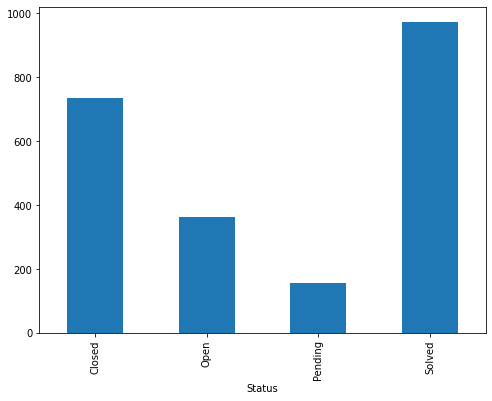

In [51]:
# visualize it
fig = plt.figure (figsize = (8, 6))
data.groupby ('Status').Description.count ().plot.bar (ylim = 0)
plt.show ()

**Splitting the data**

In [52]:
train_x, valid_x, train_y, valid_y = train_test_split (data ['Description'], data ['Status'])

**Feature engineering using TF-IDF**

In [53]:
encoder = preprocessing.LabelEncoder ()
train_y = encoder.fit_transform (train_y)
valid_y = encoder.fit_transform (valid_y)

tfidf_vect = TfidfVectorizer (analyzer = 'word', token_pattern = r'\w{1,}', max_features = 5000)
tfidf_vect.fit (data['Description'])
xtrain_tfidf = tfidf_vect.transform (train_x)
xvalid_tfidf = tfidf_vect.transform (valid_x)

**Model building and evaluation**

In [54]:
model = linear_model.LogisticRegression().fit (xtrain_tfidf, train_y)

# model summary
LogisticRegression (C = 1.0, class_weight = None, dual = False, fit_intercept = True,
                    intercept_scaling = 1, max_iter = 100, multi_class = "ovr", n_jobs = 1,
                    penalty = 'l2', random_state = None, solver = 'liblinear', tol = 0.0001,
                    verbose = 0, warm_start = False)

# checking accuracy
accuracy = metrics.accuracy_score (model.predict (xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy)

Accuracy:  0.6894075403949731


In [55]:
# classification report
print (metrics.classification_report (valid_y, model.predict (xvalid_tfidf),
                                     target_names = data ['Status'].unique ()))

              precision    recall  f1-score   support

      Closed       0.64      0.88      0.74       193
        Open       0.69      0.18      0.29       110
      Solved       0.71      0.15      0.24        34
     Pending       0.75      0.86      0.80       220

    accuracy                           0.69       557
   macro avg       0.70      0.52      0.52       557
weighted avg       0.69      0.69      0.64       557



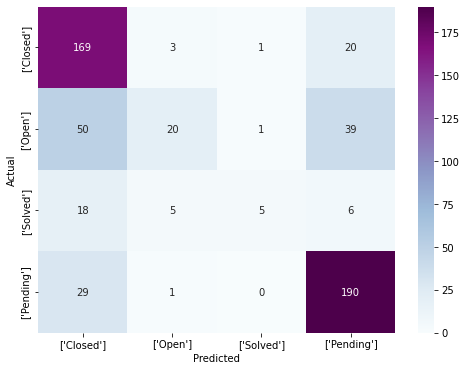

In [56]:
from sklearn.metrics import confusion_matrix

# confusion matrix
conf_matrix = confusion_matrix (valid_y, model.predict (xvalid_tfidf))

# visualizing confusion matrix
category_id_df = data [['Status', "category_id"]].drop_duplicates ().sort_values ('category_id')
category_to_id = dict (category_id_df.values)
id_to_category = dict (category_id_df [['category_id', 'Status']].values)

fig, ax = plt.subplots (figsize = (8, 6))
sns.heatmap (conf_matrix, annot = True, fmt = 'd', cmap = "BuPu",
            xticklabels = category_id_df [['Status']].values,
            yticklabels = category_id_df [["Status"]].values)
plt.ylabel ("Actual")
plt.xlabel ("Predicted")
plt.show ()

In [57]:
# prediction example
text = ['Comcast refuses to help troubleshoot and correct my service.']
text_features = tfidf_vect.transform (text)
predictions = model.predict (text_features)
print (text)
print ("  - Predicted as: '{}'".format (id_to_category [predictions [0]]))

['Comcast refuses to help troubleshoot and correct my service.']
  - Predicted as: 'Pending'


**Implementing sentiment analysis**

In [58]:
# import necesserary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read the data
data = pd.read_csv ('../input/22000-scotch-whisky-reviews/scotch_review.csv')

# Look at the top 10 rows of the data
data.head (10)

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
5,6,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,96,85.00,$,"Powerful, muscular, well-textured, and invigor..."
6,7,"Gold Bowmore, 1964 vintage, 42.4%",Single Malt Scotch,96,6250.00,$,Deep gold color. Surprisingly lively on the no...
7,8,"Bowmore, 40 year old, 44.8%",Single Malt Scotch,96,11000.00,$,"Definitely showing its age, but not in a bad w..."
8,9,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.00,$,The Dalmore is one of a handful of whiskies th...
9,10,"Glenfarclas Family Casks 1954 Cask #1260, 47.2%",Single Malt Scotch,96,3360,$,A rich amber color and elegantly oxidized note...


In [59]:
# understand the data types of the columns
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2247 non-null   int64 
 1   name          2247 non-null   object
 2   category      2247 non-null   object
 3   review.point  2247 non-null   int64 
 4   price         2247 non-null   object
 5   currency      2247 non-null   object
 6   description   2247 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


In [60]:
# looking at the summary of descriptions
data.description.head (10)

0    Magnificently powerful and intense. Caramels, ...
1    What impresses me most is how this whisky evol...
2    There have been some legendary Bowmores from t...
3    With a name inspired by a 1926 Buster Keaton m...
4    Captivating, enticing, and wonderfully charmin...
5    Powerful, muscular, well-textured, and invigor...
6    Deep gold color. Surprisingly lively on the no...
7    Definitely showing its age, but not in a bad w...
8    The Dalmore is one of a handful of whiskies th...
9    A rich amber color and elegantly oxidized note...
Name: description, dtype: object

**Text preprocessing**

In [61]:
# import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

# lower casing and removing pucntuations
data ['description'] = data ['description'].apply (lambda x: " ".join (x.lower () for x in x.split ()))
data ['description'] = data ['description'].str.replace ("""[^\w\s]""","")
data.description.head (10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


0    magnificently powerful and intense caramels dr...
1    what impresses me most is how this whisky evol...
2    there have been some legendary bowmores from t...
3    with a name inspired by a 1926 buster keaton m...
4    captivating enticing and wonderfully charming ...
5    powerful muscular welltextured and invigoratin...
6    deep gold color surprisingly lively on the nos...
7    definitely showing its age but not in a bad wa...
8    the dalmore is one of a handful of whiskies th...
9    a rich amber color and elegantly oxidized note...
Name: description, dtype: object

In [62]:
# remove of stop words
stop = stopwords.words ('english')
data ['description'] = data ['description'].apply (lambda x: " ".join (x for x in x.split () if x not in stop))
data.description.head (10)

0    magnificently powerful intense caramels dried ...
1    impresses whisky evolves incredibly complex no...
2    legendary bowmores mid60s every bit equal shar...
3    name inspired 1926 buster keaton movie 1698 bo...
4    captivating enticing wonderfully charming firs...
5    powerful muscular welltextured invigorating ev...
6    deep gold color surprisingly lively nose age c...
7    definitely showing age bad way distillery char...
8    dalmore one handful whiskies seem able age cas...
9    rich amber color elegantly oxidized notes gree...
Name: description, dtype: object

In [63]:
# Lemmatization
data ['description'] = data ['description'].apply (lambda x: " ".join ([Word (word).
                                                                       lemmatize () for word in x.split ()]))
data.description.head (10)

0    magnificently powerful intense caramel dried p...
1    impress whisky evolves incredibly complex nose...
2    legendary bowmores mid60s every bit equal shar...
3    name inspired 1926 buster keaton movie 1698 bo...
4    captivating enticing wonderfully charming firs...
5    powerful muscular welltextured invigorating ev...
6    deep gold color surprisingly lively nose age c...
7    definitely showing age bad way distillery char...
8    dalmore one handful whisky seem able age cask ...
9    rich amber color elegantly oxidized note greet...
Name: description, dtype: object

**Exploratory data analysis**

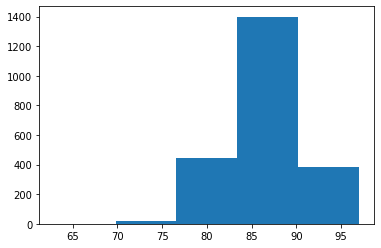

              Unnamed: 0  name  category  price  currency  description
review.point                                                          
63                     1     1         1      1         1            1
70                     2     2         2      2         2            2
71                     1     1         1      1         1            1
72                     4     4         4      4         4            4
73                     2     2         2      2         2            2
74                     2     2         2      2         2            2
75                     3     3         3      3         3            3
76                     3     3         3      3         3            3
77                    12    12        12     12        12           12
78                    18    18        18     18        18           18
79                    31    31        31     31        31           31
80                    83    83        83     83        83           83
81    

In [64]:
# dropping null values
data.dropna (inplace = True)

# the histogram reveals this dataset is highly unbalanced toward rating 85-90
data ['review.point'].hist (bins = 5, grid = False)
plt.show ()
print (data.groupby (data['review.point']).count ())

In [65]:
# to make it balanced data, I sampled each score by the lowest n-count
score_1 = data [data ['review.point'] == 83].sample (n = 141)
score_2 = data [data ['review.point'] == 85].sample (n = 198)
score_3 = data [data ['review.point'] == 87].sample (n = 221)
score_4 = data [data ['review.point'] == 90].sample (n = 188)
score_5 = data [data ['review.point'] == 93].sample (n = 84)

# here I create a balanced dataset
reviews_sample = pd.concat ([score_1, score_2, score_3, score_4, score_5], axis = 0)
reviews_sample.reset_index (drop = True, inplace = True)

# printing count by 'review.point' to check dataset is now balanced
print (reviews_sample.groupby ('review.point').count ())

              Unnamed: 0  name  category  price  currency  description
review.point                                                          
83                   141   141       141    141       141          141
85                   198   198       198    198       198          198
87                   221   221       221    221       221          221
90                   188   188       188    188       188          188
93                    84    84        84     84        84           84


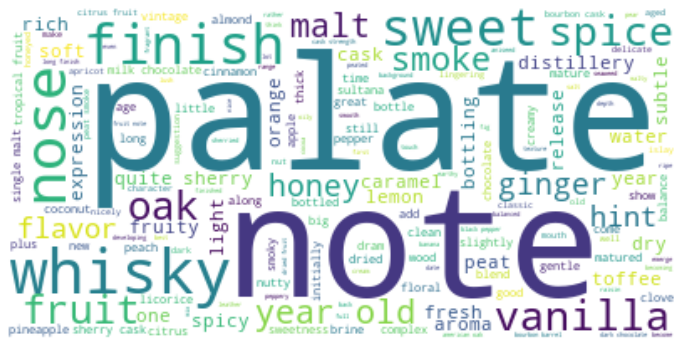

In [66]:
# Let's build a word cloud looking at the 'description' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud functions input needs to be a single string of text
# here I'm concatenating all descriptions into a single string
reviews_str = reviews_sample.description.str.cat ()
wordcloud = WordCloud (background_color = 'white').generate (reviews_str)
plt.figure (figsize = (12, 12))
plt.imshow (wordcloud, interpolation = 'bilinear')
plt.axis ('off')
plt.show ()

Text(0.5, 1.0, 'Reviews with negative scores')

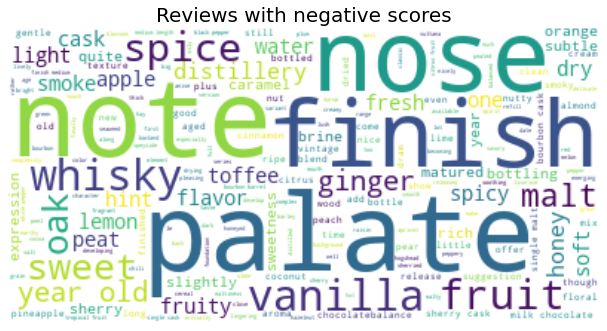

In [67]:
# now let's split the data into negative (score 1 or 2) and positive (4 or 5) reviews
negative_reviews = reviews_sample [reviews_sample ['review.point'].isin ([83, 85])]
positive_reviews = reviews_sample [reviews_sample ['review.point'].isin ([90, 93])]

# transform to single string 
negative_reviews_str = negative_reviews.description.str.cat ()
positive_reviews_str = positive_reviews.description.str.cat ()

# create wordclouds
wordcloud_negative = WordCloud (background_color = 'white').generate (negative_reviews_str)
wordcloud_positive = WordCloud (background_color = 'white').generate (positive_reviews_str)

# Plot
fig = plt.figure (figsize = (12, 12))
ax1 = fig.add_subplot (211)
ax1.imshow (wordcloud_negative, interpolation = 'bilinear')
ax1.axis ('off')
ax1.set_title ('Reviews with negative scores', fontsize = 20)

Text(0.5, 1.0, 'Reviews with positive scores')

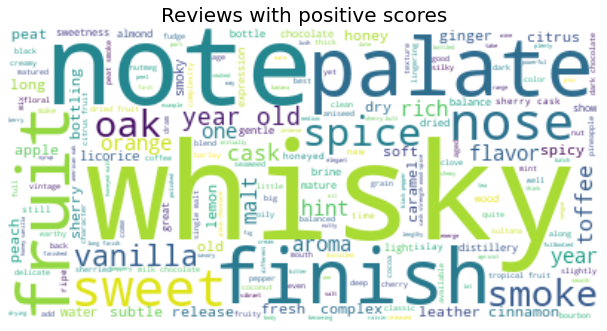

In [68]:
fig = plt.figure (figsize = (12, 12))
ax2 = fig.add_subplot (212)
ax2.imshow (wordcloud_positive, interpolation = 'bilinear')
ax2.axis ('off')
ax2.set_title ("Reviews with positive scores", fontsize = 20)

**Summarizing text data**

In [69]:
# import BeautifulSoup and urllib libraries to fetch data from Wikipedia
from bs4 import BeautifulSoup
from urllib.request import urlopen 

# function to get data from Wikipedia
def get_only_text (url):
    page = urlopen (url)
    soup = BeautifulSoup (page)
    text = ' '.join (map (lambda p: p.text, soup.find_all ('p')))
    print (text)
    return soup.title.text, text

# mention from Wikipedia url
url = "https://en.wikipedia.org/wiki/Natural_language_processing"

# call the function created above
text = get_only_text (url)

# count the number of letters
len ("".join (text))


Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
 Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.
 Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articula

9004

In [70]:
# let's see first 500 letters from the text
text [:500]

('Natural language processing - Wikipedia',
 'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.\n Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intell

**Clustering documents**

In [71]:
# import libraries
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

# Let's use the same comcastcomplaints dataset we use for classification
data = pd.read_csv ('../input/comcastcomplaints/comcast_consumeraffairs_complaints.csv')

# selecting required columns and rows
data = data [['text']]
data = data [pd.notnull (data ['text'])]

# let's do the clustering for just 300 rows. It's easier to interpret
data_sample = data.sample (300)

**Preprocessing and TF-IDF feature engineering**

In [72]:
# remove unwanted symbol
data_sample ['text'] = data_sample ['text'].str.replace ('XXXX', "")

# convert dataframe to list
complaints = data_sample ['text'].tolist ()

# create the rank of documents - I will use it later
ranks = []
for i in range (1, len (complaints) + 1):
    ranks.append (i)
    
# stop words
stopwords = nltk.corpus.stopwords.words ('english')

# load 'stemmer'
stemmer = SnowballStemmer ('english')

# functions for sentence tokenizer, to remove tokens and raw # pucntuation
def tokenize_and_stem (text):
    tokens = [word for sent in nltk.sent_tokenize (text) for word in nltk.word_tokenize (sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search ('[a-zA-Z]', token):
            filtered_tokens.append (token)
    stems = [stemmer.stem (t) for t in filtered_tokens]
    return stems

def tokenize_only (text):
    tokens =[word.lower () for sent in nltk.sent_tokenize (text) for word
            in nltk.word_tokenize (sent)]

    filtered_tokens = []
    for token in tokens:
        if re.search ('[a-zA-Z]', token):
            filtered_tokens.append (token)
    return filtered_tokens

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer (max_df = 0.8, max_features = 200000, min_df = 0.2, stop_words = 'english',
                                   use_idf = True, tokenizer = tokenize_and_stem, ngram_range = (1, 3))
# fit the vectiorizer to data
tfidf_matrix = tfidf_vectorizer.fit_transform (complaints)
terms = tfidf_vectorizer.get_feature_names ()
print (tfidf_matrix.shape)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


(300, 50)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Clustering using K-means**

In [73]:
# import Kmeans
from sklearn.cluster import KMeans

# define numbers of clusters
num_clusters = 6

# running clustreing algorithm
km = KMeans (n_clusters = num_clusters)
km.fit (tfidf_matrix)

# final clusters
clusters = km.labels_.tolist ()
complaints_data = {'rank': ranks, 'complaints': complaints, 'cluster': clusters}
frame = pd.DataFrame (complaints_data, index = [clusters], columns = ['rank', 'cluster'])

# number of docs per cluster
frame ['cluster'].value_counts ()

4    69
1    69
3    49
0    43
2    42
5    28
Name: cluster, dtype: int64

**Identify cluster behavior**

In [74]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in complaints:
    allwords_stemmed = tokenize_and_stem (i)
    totalvocab_stemmed.extend (allwords_stemmed)
    allwords_tokenized = tokenize_only (i)
    totalvocab_tokenized.extend (allwords_tokenized)
vocab_frame = pd.DataFrame ({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

# sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort ()[:, ::-1]
for i in range (num_clusters):
    print ("Cluster %d words:" % i, end = "")
    for ind in order_centroids [i, :6]:
        print (' %s' % vocab_frame.loc [terms [ind].split (' ')].
              values.tolist ()[0][0].encode ('utf-8', 'ignore'), end = ',')
        print ()

Cluster 0 words: b'months',
 b'pay',
 b'year',
 b'internet',
 b'time',
 b"n't",
Cluster 1 words: b'service',
 b'phone',
 b'customers',
 b'cancel',
 b'customers',
 b'told',
Cluster 2 words: b'said',
 b'tv',
 b'did',
 b'asked',
 b'service',
 b"n't",
Cluster 3 words: b'business',
 b'company',
 b'customers',
 b'service',
 b"'s",
 b"n't",
Cluster 4 words: b"n't",
 b'work',
 b'cable',
 b'coming',
 b'time',
 b'internet',
Cluster 5 words: b'charge',
 b'service',
 b'problem',
 b'months',
 b'accounts',
 b'time',


**Plot the clusters on a 2D graph**

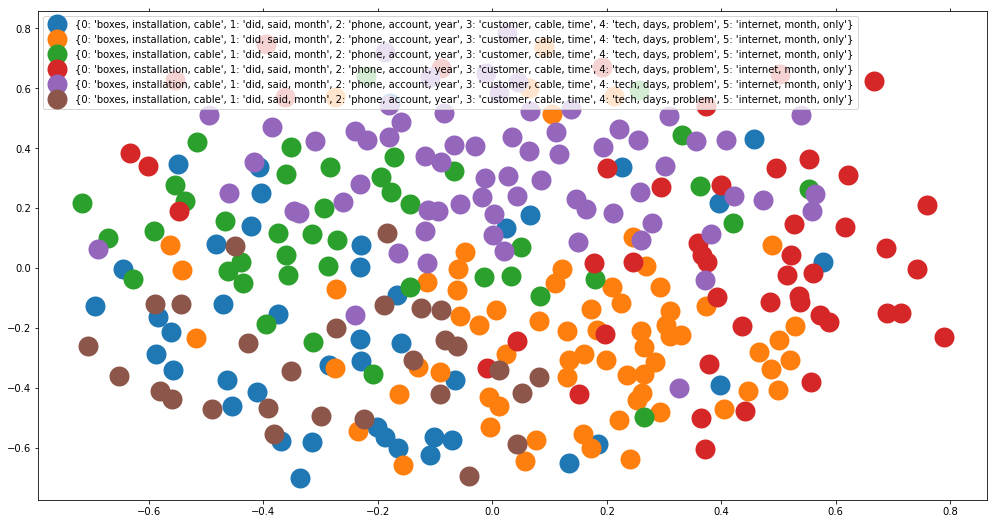

In [75]:
# similarity
similarity_distance = 1 - cosine_similarity (tfidf_matrix)

# convert two components as I'm plotting points in a two-dimensional plane
mds = MDS (n_components = 2, dissimilarity = 'precomputed', random_state = 1)
pos = mds.fit_transform (similarity_distance)
xs, ys = pos [:, 0], pos [:, 1]

# set up colors per clusters using a dict
clusters_colors = {0: '#1b9e77', 1: '#d95f020', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#S2691E'}

# set up cluster names using a dict
cluster_names = {0: 'boxes, installation, cable',
                 1: 'did, said, month',
                 2: 'phone, account, year',
                 3: 'customer, cable, time',
                 4: 'tech, days, problem',
                 5: 'internet, month, only'}

# finally plot it
%matplotlib inline

# create data frame that has the result of the MDS and the cluster
df = pd.DataFrame (dict (x = xs, y = ys, label = clusters))
groups = df.groupby ('label')

# set up plot
fig, ax = plt.subplots(figsize = (17, 9))
for name, group in groups:
    ax.plot (group.x, group.y, marker = 'o', linestyle = "", ms = 20,
            label = cluster_names, mec = 'none')
ax.set_aspect ('auto')
ax.tick_params (axis = 'x', which = 'both', bottom = 'off', top = 'off', labelbottom = 'off')
ax.tick_params (axis = 'y', which = 'both', left = 'off', top = 'off', labelleft = 'off')
ax.legend (numpoints = 1)
plt.show ()

# **Deep learning in Natural language processing**

**Classifying text**

In [76]:
# read the dataset
import pandas as pd
data_s = pd.read_csv ('../input/email-spam-dataset/lingSpam.csv')

# preprocessing the data
from nltk.corpus import stopwords
from nltk import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# remove stop words
stop = stopwords.words ('english')
data_s ['Body'] = data_s ['Body'].apply (lambda x: " ".join (x for x in x.split () if x not in stop))

# rename column names
data_s = data_s.rename (columns = {"Body": "Email", "Label": "Target"})
data_s.head (10)

,Unnamed: 0,Email,Target
0,0,Subject: great part-time summer job ! * * * * ...,1
1,1,Subject: auto insurance rates high ? dear nlpe...,1
2,2,Subject: want best economical hunting vacation...,1
3,3,Subject: email 57 million people $ 99 57 milli...,1
4,4,Subject: n't miss ! attention ! warning ! adul...,1
5,5,Subject: see amazing world record sex ! attent...,1
6,6,Subject: help get loan ! ! ! subject : : debt ...,1
7,7,Subject: beat irs & pay-no - = = = = = = = = =...,1
8,8,Subject: email 57 million people $ 99 57 milli...,1
9,9,Subject: make $ 3500 per week using home compu...,1


In [77]:
# delete punctuations, convert text in lower case and delete the double space
data_s ['Email'] = data_s ['Email'].apply (lambda x: re.sub ('[!@#$:).:,?&]', "", x.lower ()))
data_s ['Email'] = data_s ['Email'].apply (lambda x: re.sub (' ', ' ', x))
data_s ['Email'].head (10)                                                             

0    subject great part-time summer job  * * * * * ...
1    subject auto insurance rates high  dear nlpeop...
2    subject want best economical hunting vacation ...
3    subject email 57 million people  99 57 million...
4    subject n't miss  attention  warning  adults  ...
5    subject see amazing world record sex  attentio...
6    subject help get loan    subject   debt  help ...
7    subject beat irs  pay-no - = = = = = = = = = =...
8    subject email 57 million people  99 57 million...
9    subject make  3500 per week using home compute...
Name: Email, dtype: object

In [78]:
# import required libraries
import sys, os, re, csv, codecs
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from keras.models import Sequential

# separating text and target classes
list_sentences_rawdata = data_s ['Email'].fillna ("_na_").sort_values
list_classes = ["Target"]
target = data_s [list_classes].values
To_Process = data_s [["Email", "Target"]]

# train and test split with 80:20 ratio
train, test = train_test_split (To_Process, test_size = 0.2)

# define the sequence lengths, max number of words and embedding dimensions
MAX_SEQUENCE_LENGTH = 400

# top 20000 frequently occuring words
MAX_NB_WORDS = 30000

# get the frequently occuring words
tokenizer = Tokenizer (num_words = MAX_NB_WORDS)
tokenizer.fit_on_texts (train.Email)
train_sequences = tokenizer.texts_to_sequences (train.Email)
test_sequences = tokenizer.texts_to_sequences (test.Email)

# dictionary containing words and their index
word_index = tokenizer.word_index

print ("Found %s unique tokens." %len (word_index))

# get only the top frequent words on train
train_data = pad_sequences (train_sequences, maxlen = MAX_SEQUENCE_LENGTH)

# get only the top frequent words on test
test_data = pad_sequences (test_sequences, maxlen = MAX_SEQUENCE_LENGTH)

print (train_data.shape)
print (test_data.shape)

Found 58761 unique tokens.
(2084, 400)
(521, 400)


In [79]:
train_labels = train ['Target']
test_labels = test ['Target']

# import library
from sklearn.preprocessing import LabelEncoder

# converts the character array to numeric array. Assigns levels to unique labels
le = LabelEncoder ()
le.fit (train_labels)
train_labels = le.transform (train_labels)
test_labels = le.transform (test_labels)

print (le.classes_)
print (np.unique (train_labels, return_counts = True))
print (np.unique (test_labels, return_counts = True))

[0 1]
(array([0, 1]), array([1739,  345]))
(array([0, 1]), array([433,  88]))


In [80]:
# changing data types
labels_train = to_categorical (np.asarray (train_labels))
labels_test = to_categorical (np.asarray (test_labels))
print ("Shape of data tensor:", train_data.shape)
print ("Shape of label tensor:", labels_train.shape)
print ("Shape of label tensor:", labels_test.shape)

Shape of data tensor: (2084, 400)
Shape of label tensor: (2084, 2)
Shape of label tensor: (521, 2)


In [81]:
EMBEDDING_DIM = 200
print (MAX_SEQUENCE_LENGTH)

400


**Model building and predicting**

In [82]:
print ('Training CNN 1D model.')
model = Sequential ()
model.add (Embedding (MAX_NB_WORDS, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))
model.add (Dropout (0.5))
model.add (Conv1D (128, 5, activation = 'relu'))
model.add (MaxPooling1D (5))
model.add (Dropout (0.5))
model.add (BatchNormalization ())
model.add (Conv1D (128, 5, activation = 'relu'))
model.add (MaxPooling1D (5))
model.add (Dropout (0.5))
model.add (BatchNormalization ())
model.add (Flatten ())
model.add (Dense (128, activation = 'relu'))
model.add (Dense (2, activation = 'softmax'))
model.compile (loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
model.fit (train_data, labels_train, batch_size = 64, epochs = 5, validation_data = (test_data, labels_test))

Training CNN 1D model.


2022-06-26 18:34:14.354307: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-26 18:34:14.751772: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
33/33 [==============================] - 24s 682ms/step - loss: 0.6438 - acc: 0.7442 - val_loss: 0.5286 - val_acc: 0.8311
Epoch 2/5
33/33 [==============================] - 22s 676ms/step - loss: 0.3343 - acc: 0.8594 - val_loss: 2.5377 - val_acc: 0.1689
Epoch 3/5
33/33 [==============================] - 22s 670ms/step - loss: 0.0894 - acc: 0.9616 - val_loss: 4.1136 - val_acc: 0.1689
Epoch 4/5
33/33 [==============================] - 22s 672ms/step - loss: 0.0480 - acc: 0.9837 - val_loss: 4.3250 - val_acc: 0.1689
Epoch 5/5
33/33 [==============================] - 22s 671ms/step - loss: 0.0295 - acc: 0.9899 - val_loss: 4.2445 - val_acc: 0.1689


In [83]:
# predictions on test data
predicted = model.predict (test_data)
predicted

array([[0.00405895, 0.99594104],
       [0.00401028, 0.99598974],
       [0.01007367, 0.98992634],
       ...,
       [0.00360156, 0.99639845],
       [0.00606086, 0.99393916],
       [0.0088594 , 0.99114066]], dtype=float32)

In [84]:
# model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score (labels_test, predicted.round(), zero_division = 1)
print ("Precision: {}".format (precision))
print ("Recall: {}".format (recall))
print ("Fscore: {}".format (fscore))
print ("Support: {}".format (support))
print ("----------------------------")
print (sklearn.metrics.classification_report (labels_test, predicted.round (), zero_division = 1))

Precision: [1.         0.16890595]
Recall: [0. 1.]
Fscore: [0.         0.28899836]
Support: [433  88]
----------------------------
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       433
           1       0.17      1.00      0.29        88

   micro avg       0.17      0.17      0.17       521
   macro avg       0.58      0.50      0.14       521
weighted avg       0.86      0.17      0.05       521
 samples avg       0.17      0.17      0.17       521



In [85]:
# define RNN model
from keras.layers.recurrent import SimpleRNN

# model training
print ('Training SIMPLERNN model.')
model = Sequential ()
model.add (Embedding (MAX_NB_WORDS, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))
model.add (SimpleRNN (2, input_shape = (None, 1)))
model.add (Dense (2, activation = 'softmax'))
model.compile (loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit (train_data, labels_train, batch_size = 16, epochs = 5, validation_data = (test_data, labels_test))

Training SIMPLERNN model.
Epoch 1/5
131/131 [==============================] - 25s 179ms/step - loss: 0.4539 - accuracy: 0.9482 - val_loss: 0.3621 - val_accuracy: 0.9731
Epoch 2/5
131/131 [==============================] - 23s 177ms/step - loss: 0.2907 - accuracy: 0.9952 - val_loss: 0.2818 - val_accuracy: 0.9712
Epoch 3/5
131/131 [==============================] - 23s 174ms/step - loss: 0.2146 - accuracy: 0.9981 - val_loss: 0.2343 - val_accuracy: 0.9674
Epoch 4/5
131/131 [==============================] - 23s 174ms/step - loss: 0.1696 - accuracy: 0.9966 - val_loss: 0.2060 - val_accuracy: 0.9712
Epoch 5/5
131/131 [==============================] - 23s 175ms/step - loss: 0.1379 - accuracy: 0.9981 - val_loss: 0.1783 - val_accuracy: 0.9693


In [86]:
# prediction on test data
predicted_Srnn = model.predict (test_data)
predicted_Srnn

array([[0.97040457, 0.02959542],
       [0.9603484 , 0.03965155],
       [0.9898117 , 0.01018826],
       ...,
       [0.98983616, 0.01016389],
       [0.9892313 , 0.0107687 ],
       [0.9893238 , 0.01067619]], dtype=float32)

In [87]:
# model evaluation
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score (labels_test, predicted_Srnn.round ())
print ('precision: {}'.format (precision))
print ('recall: {}'.format (recall))
print ('fscor: {}'.format (fscore))
print ('support: {}'.format (support))

print ('----------------------------')

print (sklearn.metrics.classification_report (labels_test, predicted_Srnn.round ()))

precision: [0.9771167  0.92857143]
recall: [0.98614319 0.88636364]
fscor: [0.9816092  0.90697674]
support: [433  88]
----------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       433
           1       0.93      0.89      0.91        88

   micro avg       0.97      0.97      0.97       521
   macro avg       0.95      0.94      0.94       521
weighted avg       0.97      0.97      0.97       521
 samples avg       0.97      0.97      0.97       521



In [88]:
# model training LSTM (Long short-term memory)
print ('Training LSTM model.')
model = Sequential ()
model.add (Embedding (MAX_NB_WORDS, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))
model.add (LSTM (activation = 'relu', return_sequences = True, units = 128))
model.add (Dropout (0.2))
model.add (BatchNormalization ())
model.add (Flatten ())
model.add (Dense (2, activation = 'softmax'))
model.compile (loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit (train_data, labels_train, batch_size = 16, epochs = 5, validation_data = (test_data, labels_test))

Training LSTM model.
Epoch 1/5
131/131 [==============================] - 63s 463ms/step - loss: 0.1395 - accuracy: 0.9463 - val_loss: 0.4008 - val_accuracy: 0.8311
Epoch 2/5
131/131 [==============================] - 60s 456ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.3754 - val_accuracy: 0.8388
Epoch 3/5
131/131 [==============================] - 60s 459ms/step - loss: 0.0050 - accuracy: 0.9971 - val_loss: 0.1022 - val_accuracy: 0.9597
Epoch 4/5
131/131 [==============================] - 60s 460ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0956 - val_accuracy: 0.9597
Epoch 5/5
131/131 [==============================] - 61s 466ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0924 - val_accuracy: 0.9789


In [89]:
# predicition on text data
predicted_lstm = model.predict (test_data)
predicted_lstm

array([[9.9999952e-01, 4.2968315e-07],
       [1.0000000e+00, 3.2869380e-08],
       [1.0000000e+00, 3.6259292e-19],
       ...,
       [1.0000000e+00, 2.1563826e-16],
       [1.0000000e+00, 1.3605404e-12],
       [1.0000000e+00, 1.9814904e-15]], dtype=float32)

In [90]:
# model evaluation
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score (labels_test, predicted_lstm.round ())

print ('precision: {}'.format (precision))
print ('recall: {}'.format (recall))
print ('fscore: {}'.format (fscore))
print ('support: {}'.format (support))

print ('----------------------------')

print (sklearn.metrics.classification_report (labels_test, predicted_lstm.round ()))

precision: [0.97522523 1.        ]
recall: [1.    0.875]
fscore: [0.98745724 0.93333333]
support: [433  88]
----------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       433
           1       1.00      0.88      0.93        88

   micro avg       0.98      0.98      0.98       521
   macro avg       0.99      0.94      0.96       521
weighted avg       0.98      0.98      0.98       521
 samples avg       0.98      0.98      0.98       521

